In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import numpy as np
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg

from PIL import Image
import glob

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def load_image(image):
    #each image is loaded --> resize --> vectorize --> store into a matrix T
    starter = Image.open(image)
    im_resize = resize_image(starter)
    #im_vector = vectorize_image(im_resize)
    #create a column vector
    #im_vector = im_vector.reshape((im_vector.size,1))
    #store into a big matrix
    #return im_vector
    return im_resize
        
def resize_image(image):
    #resize by a factor 16
    im_resize = image.resize(((image.size[0]/4),(image.size[1]/4)))
    return im_resize

def vectorize_image(image):
    #convert teh image into an array
    im_arr = np.array(image)
    im_flat = im_arr.ravel()
    
    return im_flat


In [3]:
im_paths = []
counter = 0 
for root,dirs,files in os.walk(os.getcwd()):
    #find all the file images
    #if pgm is teh extension and ambient is not in the name
    for f in files:
        if "pgm" in f:
            if "Ambient" in f:
                continue
            else:
                #create the path
                im_path = root + "/" + f
                im_paths.append(im_path)
                

im = Image.open(im_paths[0]).convert("L")
# get original dimensions
#once all the images are stored ina list
#define the Height and Width
H,W = np.shape(im)[0]/4.0 ,np.shape(im)[1]/4.0 
print 'shape=',(H,W)
im_number = len(im_paths)
#create an e
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open(im_paths[i]).convert("L")
    im_resize = resize_image(im)
    arr[i,:] = np.reshape(np.asarray(im_resize),[1,H*W])
    
mean_image = np.mean(arr, axis=0)
#print(arr.shape)
plt.imshow(np.reshape(mean_image,[48,42]), cmap = plt.get_cmap("gray"))
# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image
#compute the covariance matrix
svar = np.cov(arr.T)
#compute eigenvalue and vectors
eigenVal,eigenVect = scipy.linalg.eigh(svar)
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigenVal[i]), eigenVect[:,i]) for i in range(len(eigenVal))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])

plt.imshow(np.reshape(eig_pairs[8][1],[48,42])) #and this is the tenth eigenface
plt.savefig("Eigenfaces.png",dpi=600)

shape= (48.0, 42.0)


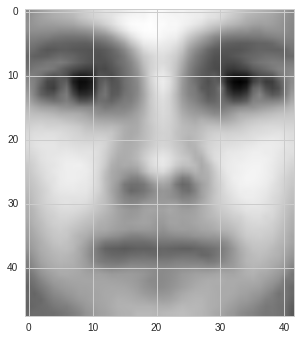

[ -9.85608553   1.60238487  -1.24013158 ..., -19.30222039 -23.75534539
 -33.97450658]


In [85]:
#now from eig_pairs take the sorted eigenVectors
#2016 eigenpairs
print(eig_pairs[0][1])
#print(eig_pairs)

[-0.00375442 -0.00622578 -0.00825054 ..., -0.0045032  -0.00362314
 -0.00289367]


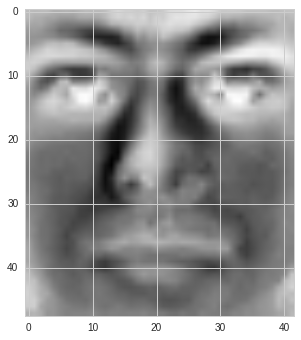

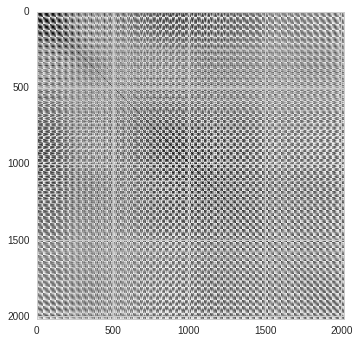

In [92]:
plt.imshow(svar)

plt.savefig("covariance.png",dpi=600)

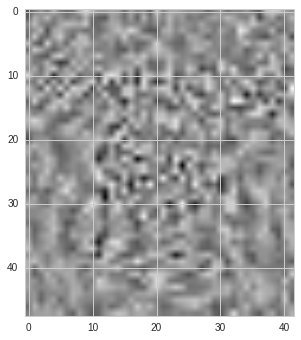

In [95]:
plt.imshow(np.reshape(eig_pairs[500][1],[48,42])) #and this is the tenth eigenface
plt.savefig("noinfo.png",dpi=600)